In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

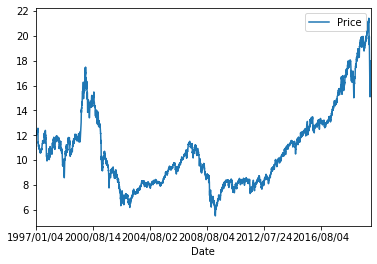

In [8]:
Data = pd.read_csv("Nomura_Global_Equity_Fund.csv")
Data.plot(x='Date', y='Price')

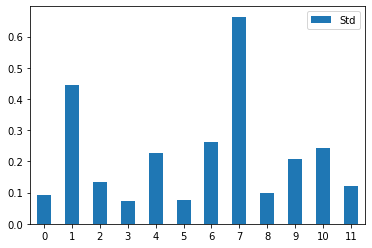

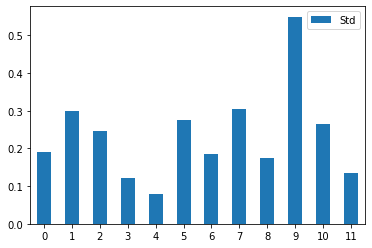

In [72]:
stdOf1997 = monthStandardDeviation(1997)
stdOf1998 = monthStandardDeviation(1998)
stdOf1997.plot.bar(rot=0)
stdOf1998.plot.bar(rot=0)

In [62]:
def investStrategy(percent, days):
    '''X percent, Y Days invest strategy Buying Info'''
    percentDataFrame = pd.DataFrame(columns = ["Date", "Price"])
    index = 0
    
    for i in range(days, Data["Price"].size):
        daysArr = np.array(Data["Price"][i - days: i])
        rateOfDates = Data["Price"][i] / daysArr
        smallThenPercent = np.less_equal(rateOfDates, (100 - percent) / 100)
        
        if (True in smallThenPercent):
            percentDataFrame.loc[index] = [Data["Date"][i], Data["Price"][i]]
            index += 1
    return percentDataFrame

def monthStandardDeviation(year):
    '''Calculate month standard deviation of one year'''
    monthStr = ["/01", "/02", "/03", "/04", "/05", "/06", "/07", "/08", "/09", "/10", "/11", "/12"]
    monthDataFrame = pd.DataFrame(columns = ["Date", "Std"])
    
    for i in range (12):
        monthPrice = []
        
        for j in range (Data["Date"].size):
            if (str(str(year) + monthStr[i]) in Data["Date"][j]):
                monthPrice.append(Data["Price"][j])
            
        monthStd = np.std(np.array(monthPrice))
        monthDataFrame.loc[i] = [str(str(year) + monthStr[i]), monthStd]
    return monthDataFrame

def investAvgPrice(dataframe):
    '''Return price average of buying point'''
    priceArr = np.array(dataframe["Price"])
    priceAvg = np.sum(priceArr) / np.size(priceArr)
    
    return priceAvg

In [63]:
tenPercentTenDays = investStrategy(10,10)
tenPercentFiveDays = investStrategy(10,5)
fivePercentTenDays = investStrategy(5,10)

avgPriceOfTPTD = investAvgPrice(tenPercentTenDays)
avgPriceOfTPFD = investAvgPrice(tenPercentFiveDays)
avgPriceOfFPTD = investAvgPrice(fivePercentTenDays)

print("tenPercentTenDays avg price : ", avgPriceOfTPTD)
print("tenPercentFiveDays avg price : ", avgPriceOfTPFD)
print("fivePercentTenDays avg price : ", avgPriceOfFPTD)

tenPercentTenDays avg price :  9.91132530120482
tenPercentFiveDays avg price :  10.968
fivePercentTenDays avg price :  10.496696035242291
